<a href="https://colab.research.google.com/github/abhishubh32832/Airbnb_Booking_Analysis/blob/main/Airbnb_Bookings_Analysis_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

import statistics
from collections import Counter

#NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#word cloud
from wordcloud import WordCloud, ImageColorGenerator
sns.set_theme(style="ticks", color_codes=True)

import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE_PROJECT_1(ALMA BETTER)/Airbnb NYC 2019.csv')

In [142]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [143]:
data.shape

(48895, 16)

Observations:

1)Total 16 columns are present in the dataset.

2)Total observations are 48895.

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Observations

1)Min of Price variable is 0, max is 10000.

2)Mean price is 152.

3)On an average people stay 7 days in a room.

In [146]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Observations:

1)There are total four columns with null values.

2)name column is having total 16 null values.

3)host_name is having 21 null values.

4)last_review and reviews_per_month are having more null values.

5)we will look at the columns and decide what we can do with them.

#MISSING VALUE HANDLING:

In [147]:
#missing value in percentage.
Total = data.isnull().sum()
Total.sort_values(ascending = False, inplace=True)#total per column
missing_values= round(((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending = False),2)
#missing_value data frame.
missing_total_percentage = pd.concat([Total,missing_values],axis = 1,keys = ['Total','Percentage'],sort = False)
missing_total_percentage.sort_values('Total',ascending=False, inplace=True)
missing_total_percentage

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

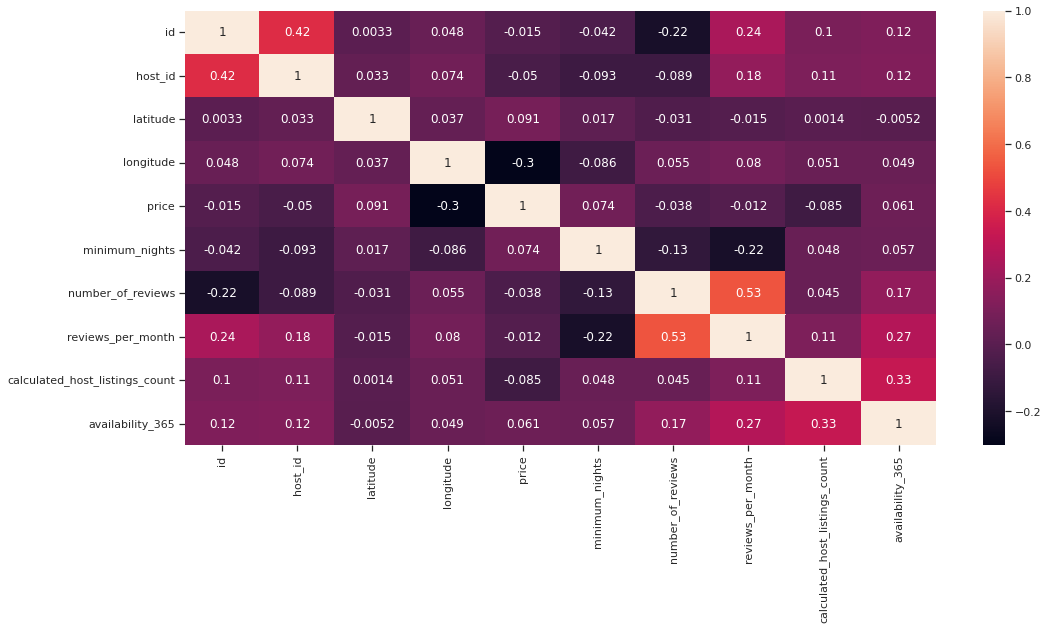

In [148]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

From data analysis point of view host_name will not be that important as its an catogorical feature and will have lots of catogories and this will not contribute in exploring the data and also from security point of view of host.
columns 'last_review' & 'reviews_per_month' are having lots of mission values with 20% of whole data we will replace with 0 for NA values in 'reviews_per_month' column.
We will convert its data type to catogorical feature and replace 'NA' with 'never'.
reviews_per_month 'NA' value handling:

In [149]:
#we can impute it with '0' as these listings didnt get any reviews yet
data.reviews_per_month.fillna(value = 0, inplace = True)

last_review 'NA' value handling

In [150]:
data.last_review

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [151]:
#to deal with NA in 'last_review', we change the column to a categorical variable (by year), 
#and those that have NA will be categorised as 'Never', as they did not get any reviews yet
# convert the date field
data.last_review.fillna(value = 0, inplace = True)
'''
data['last_review'] = pd.to_datetime(data['last_review'], format = '%Y-%m-%d')
data.last_review = data['last_review'].dt.year.astype('object')
data.last_review.fillna(value = Never, inplace = True)
'''

"\ndata['last_review'] = pd.to_datetime(data['last_review'], format = '%Y-%m-%d')\ndata.last_review = data['last_review'].dt.year.astype('object')\ndata.last_review.fillna(value = Never, inplace = True)\n"

In [152]:
data.last_review


0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48895, dtype: object

#Univariate Analysis:

1) Name




In [153]:
#name column
data.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [154]:
data[data.name.isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0


In [155]:
data.room_type

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [156]:
#This code snippit will replce the nan values.
#fillna() method will do the job...
data.name.fillna(data.room_type, inplace=True)

In [157]:
#check the changes.
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Observations:

1) We have replaced the nan values with corresponding room_type values.

2) This should solve our purpose.

In [158]:
#stop words removal:
"""
1) download the nltk stopwords in english.
2) replace pantuation and special symbols.
3) make it string and convert all into lower case.
then split the words and compair each with the stopwords and keep only those which are not in stopword list.
"""
def stop_word_removal(df):
  stop = stopwords.words('english')
  df.name = df.name.str.replace("[^\w\s]", "").str.lower()
  df.name = df.name.apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [159]:
text = stop_word_removal(data)
text = " ".join(str(i) for i in data.name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 720x360 with 0 Axes>

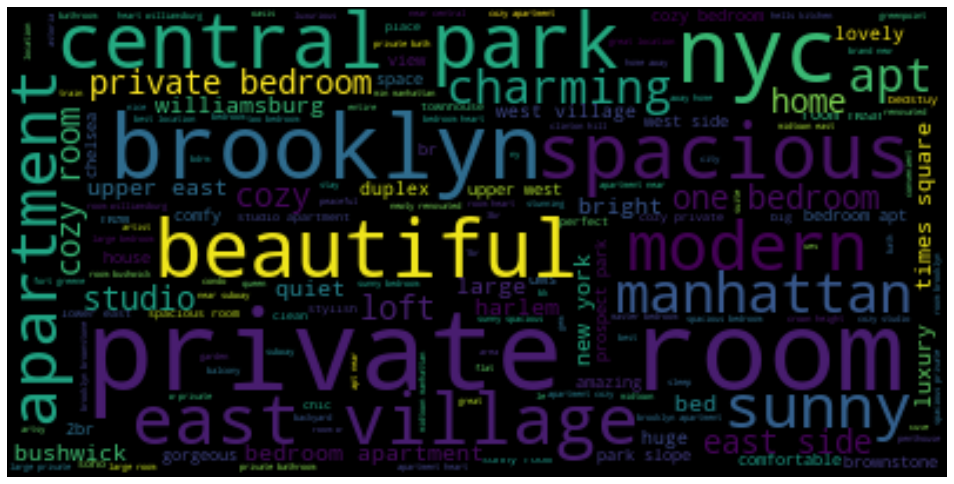

In [160]:
#wordcloud generator.
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="black").generate(text)
plt.figure(figsize=(10,5))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

In [161]:
#after removing stop words.
data.name

0                            clean quiet apt home park
1                                skylit midtown castle
2                               village harlemnew york
3                         cozy entire floor brownstone
4          entire apt spacious studioloft central park
                             ...                      
48890    charming one bedroom newly renovated rowhouse
48891        affordable room bushwickeast williamsburg
48892             sunny studio historical neighborhood
48893               43rd st time squarecozy single bed
48894                trendy duplex heart hells kitchen
Name: name, Length: 48895, dtype: object

Top 50 words from word_cloud:

In [162]:
#list of words.
name_list = list(data.name.values)
words = []
for i in name_list:
  words+=i.split()

In [163]:
#let's see top 50 used words.
_top_50_words=Counter(words).most_common()
_top_50_words=_top_50_words[0:50]

In [164]:
#dataFrame for top 50 words.
top_50_words = pd.DataFrame(_top_50_words,columns = ['words','frequency'])

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '2'),
 Text(0, 0, 'park'),
 Text(0, 0, 'east'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'village'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'home'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'central'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'luxury'),
 Text(0, 0, '1br'),
 Text(0, 0, 'location'),
 Text(0, 0, 'west'),
 Text(0, 0, 'w'),
 Text(0, 0, 'new'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'side'),
 Text(0, 0, 'charming'),
 Text(0, 0, 'bushwick'),
 Text(0, 0, 'upper'),
 Text(0, 0, 'midtown'),
 Text(0, 0, 'quiet'),
 Text(0, 0, 'one'),
 Text(0, 0, 'brownstone'),
 Text(0, 0, 'great'),
 Text(0, 0, 'br'),
 Text(0, 0, 'ha

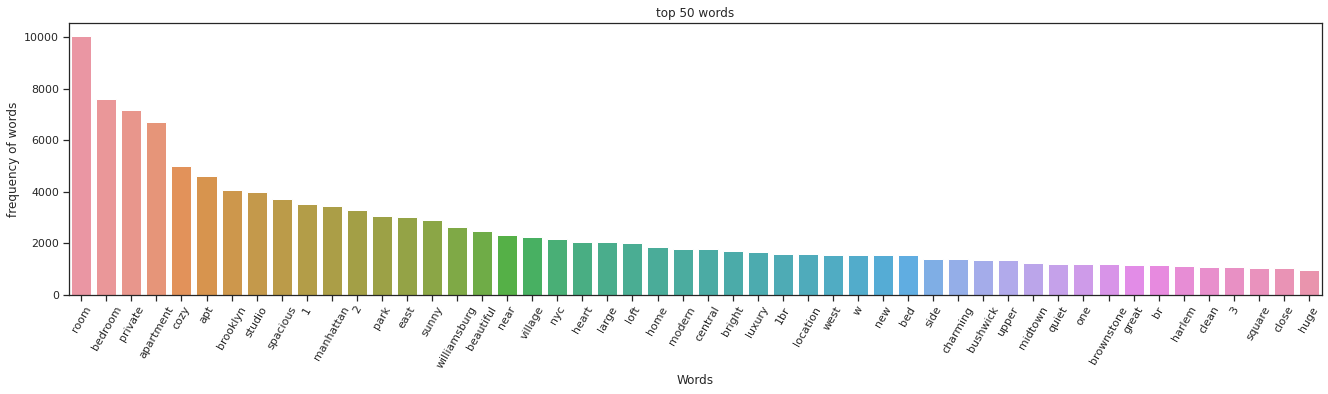

In [165]:
# visualization
plt.figure(figsize=(20,5))
ax_1= sns.barplot(x='words',y='frequency',data = top_50_words)
ax_1.set_title('top 50 words')
ax_1.set_ylabel('frequency of words')
ax_1.set_xlabel('Words')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=60)


Observation

1)The above observation shows us the top 50 words and there frequency.

2)These words can he help full in model buliding point of view.

##2) Host_name

In [166]:
data.host_name.nunique()

11452

Observations:

1)host_name this column is defining the name of host(owner).

2)There are 11452 unique hosts/owners we can use this featue directly in model building just by encoding it.response encoding will be usefull for this feature.

3) We can take nan value as one data point for model building.

##3)Neighbourhood_group:

In [167]:
data.neighbourhood_group

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [168]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

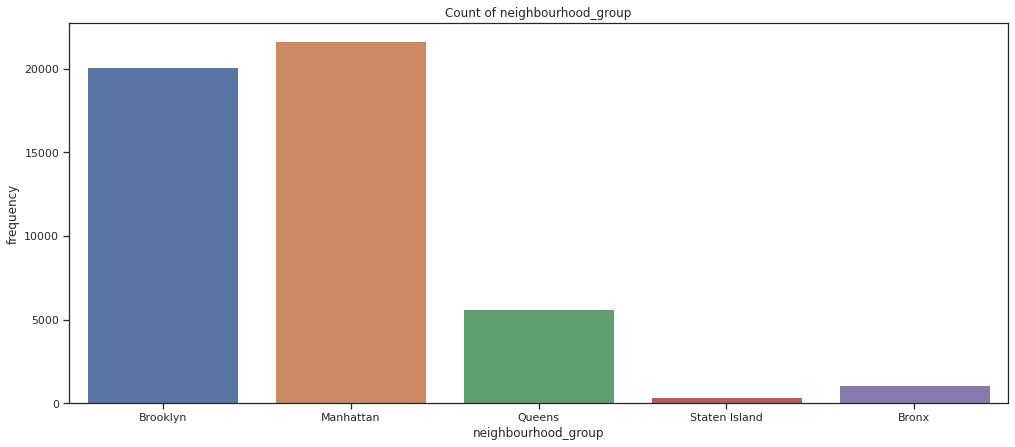

In [169]:
#count_plot
plt.figure(figsize=(15,7))
ax_3 = sns.countplot(x='neighbourhood_group',data = data)
ax_3.set_title('Count of neighbourhood_group')
ax_3.set_ylabel('frequency')
ax_3.set_xlabel('neighbourhood_group')
plt.show()

Observations:

Brooklyn and Manhattan have the highest hotel/room bookings.

##4) Neighbourhood:

In [170]:
neigh_unique_values = data.neighbourhood.value_counts()
neigh_unique_values

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Observations:

There are 221 unique neighbor.

Top 50 most common neighbours

In [171]:
#.most_common() Return a list of the n most common elements and their counts from the most common to the least.
top_50_=Counter( data.neighbourhood).most_common()
top_50_=top_50_[0:50]
top_50_[:20]

[('Williamsburg', 3920),
 ('Bedford-Stuyvesant', 3714),
 ('Harlem', 2658),
 ('Bushwick', 2465),
 ('Upper West Side', 1971),
 ("Hell's Kitchen", 1958),
 ('East Village', 1853),
 ('Upper East Side', 1798),
 ('Crown Heights', 1564),
 ('Midtown', 1545),
 ('East Harlem', 1117),
 ('Greenpoint', 1115),
 ('Chelsea', 1113),
 ('Lower East Side', 911),
 ('Astoria', 900),
 ('Washington Heights', 899),
 ('West Village', 768),
 ('Financial District', 744),
 ('Flatbush', 621),
 ('Clinton Hill', 572)]

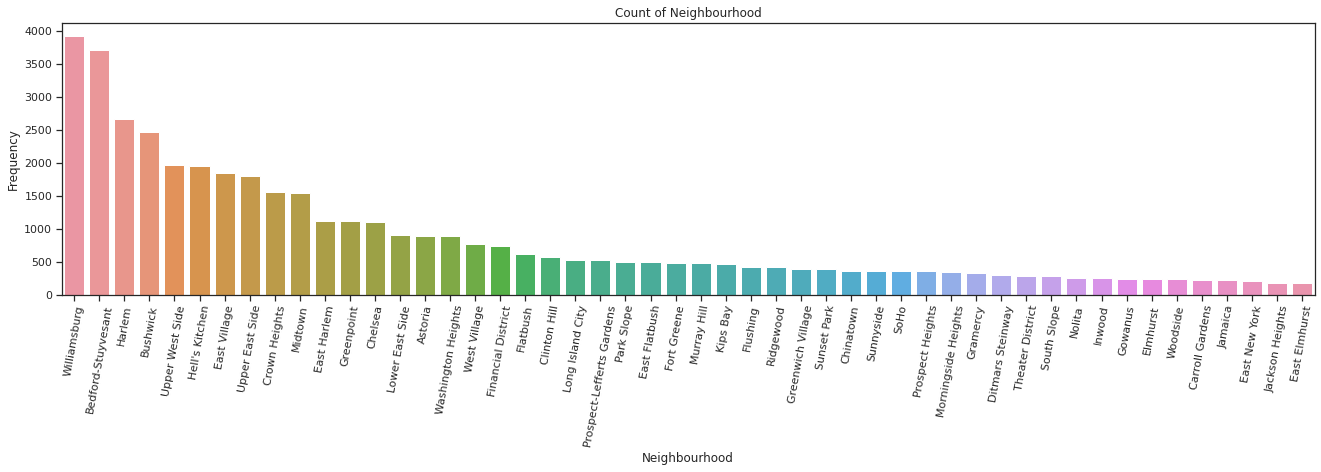

In [172]:
#count_plot
plt.figure(figsize=(20,5))
ax_4 = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
ax_4.set_title('Count of Neighbourhood')
ax_4.set_ylabel('Frequency')
ax_4.set_xlabel('Neighbourhood')
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()

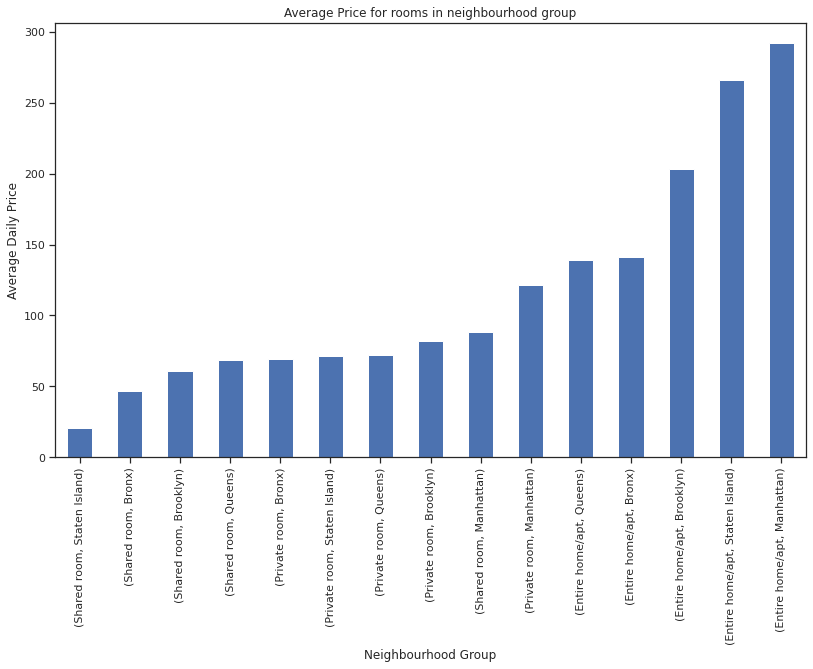

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [173]:
data.head()
plt.figure(figsize=(12,8))
df = data[data['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

Observations:

1)The above plot shows us some of the top Neighbours towns we can say.

2)People like to stay at these towns more offent.

##5) Latitude & Longitude:

In [174]:
data[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


Observation:

we can see the exact locations from this columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


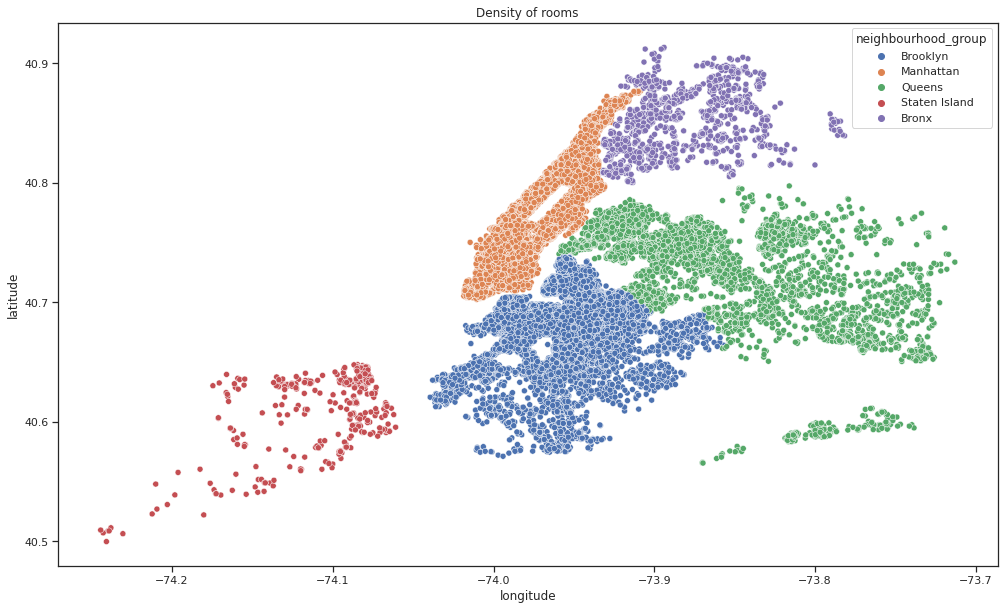

In [175]:
#simple scatterplot:

plt.figure(figsize=(15,10))
ax_5 = sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
ax_5.set_title('Density of rooms')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()

Observations

latitude and longtitude visulalizes us that Brooklyn and Manhattan are the most dense with hotels and apartments followed by queens island.

In [176]:
Long=-73.80
Lat=40.80
locations = list(zip(data.latitude, data.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

This is the basic interactive graph with all the listing in New York City appearing in a clustered fashion. You can click on clusters to see the listing it comprises. This gives a zoom-in view. You can further click on each listing to see details like Listing Name, Host Name, Price of the property, Property Type, Room Type. This visualization helps to explore every listing geographically. It gives the overall sense of how the listings are distributed across neighborhood. We can see from the map that maximum listing are clustered around Manhattan and Brooklyn region, followed by Queens, Bronx and the least number of listing are in Staten Island.

Airbnb users (customers) rate their stay on the basis of location, cleanliness and a host of other parameters. Here we work with the location score data. It would be interesting to see the average location scores for each neighbourhood. The location scores have to be a firm indicator of the appeal of the neighbourhood. Highly rated neighbourhoods will tend to have better connectivity.

##6)Room_type:

In [177]:
data.room_type.nunique()

3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


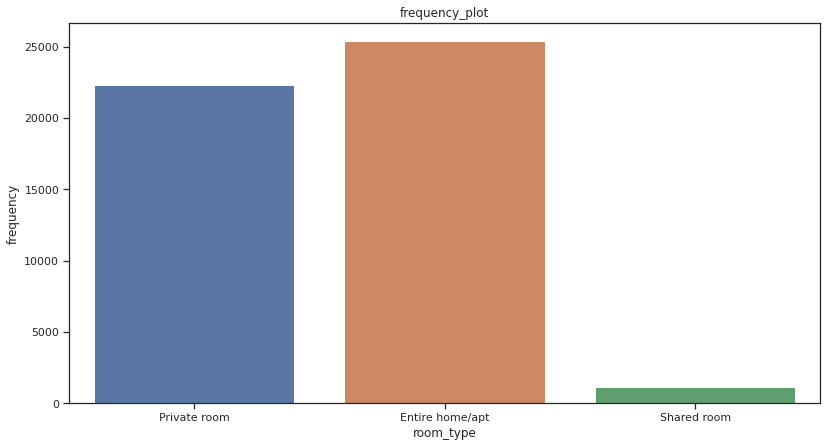

In [178]:
#count_plot'
plt.figure(figsize=(12,7))
sns_6 = sns.countplot('room_type',data = data)
sns_6.set_title('frequency_plot')
sns_6.set_ylabel('frequency')
sns_6.set_xlabel('room_type')

plt.show()

Observations

1)There are three types of rooms

2)Namely:

     1.Private room

     2.Entire home/apt room_type

     3.Shared room.

     4 People mostly prefered to take whole apartment on rent followed by Private room.

3)very few people prefered to have shared rooms.

We will try to catogorise the 'price'like cheep,affordable and expensive and then analyse the 'price' for 'room_type' as per it.

**Top 10 Private room**

We will do it for both Private room and Shared room and also will check for the top hoteliers if it is the same location or it is spread out.

In [179]:
private = data[data['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(20)


,host_id,host_name,neighbourhood,private
15261,190921808,John,Hell's Kitchen,44
14025,137358866,Kazuya,Woodside,35
16301,238321374,Eyal,Upper West Side,32
15984,224414117,Gabriel,Hell's Kitchen,30
16035,226410657,Nina,Bedford-Stuyvesant,26
16144,230192510,Zach,Fort Greene,25
16386,242962235,Yuval,Ridgewood,23
16539,252604696,Erin,Chelsea,20
15761,216235179,Nina,Bushwick,17
14024,137358866,Kazuya,Sunnyside,17


**Location wise Private room**

In [180]:
private_data = data[data['host_name']=='John']
private_data_by = private_data[['host_id','host_name','neighbourhood','latitude','longitude']]
private_data_by.head(20)

,host_id,host_name,neighbourhood,latitude,longitude
0,2787,John,Kensington,40.64749,-73.97237
429,715807,John,Greenwich Village,40.72831,-74.00177
620,1229984,John,Long Island City,40.74581,-73.95295
991,1488809,John,Bushwick,40.70339,-73.92945
1141,2397411,John,Clinton Hill,40.68545,-73.96534
1190,2267153,John,East Village,40.72760,-73.98347
1339,717562,John,Williamsburg,40.71970,-73.95741
1512,1229984,John,Long Island City,40.74530,-73.95294
1535,3561489,John,East Village,40.72482,-73.98097
1585,3726131,John,Harlem,40.80745,-73.94353


**Shared Room Exploration**

In [181]:
private = data[data['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(20)

,host_id,host_name,neighbourhood,shared
339,39528519,Max,Lower East Side,23
529,119669058,Melissa,Bedford-Stuyvesant,18
651,201015598,Anchor,Bedford-Stuyvesant,17
618,175730239,Baboucarr,Sunnyside,10
663,209386156,Abraham,East Harlem,9
727,253906467,Erik,Hell's Kitchen,9
686,223087887,Jess & Ana,Corona,8
714,248161322,Sergii,Bushwick,8
292,30509656,Orit,Port Morris,8
635,187975743,R.Henry,Hell's Kitchen,8


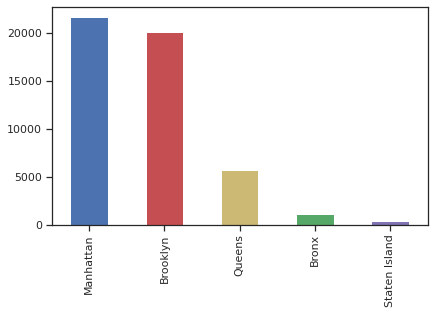

In [182]:
data['neighbourhood_group'].value_counts().plot(kind='bar',color=['b','r','y','g','m'])
plt.show()

In [183]:
private = data[data['neighbourhood_group']=='Manhattan']
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(20)

,host_id,host_name,neighbourhood,neighbourhood_group,count
15621,219517861,Sonder (NYC),Financial District,Manhattan,218
5701,12243051,Sonder,Financial District,Manhattan,51
15624,219517861,Sonder (NYC),Murray Hill,Manhattan,50
13768,120762452,Stanley,Murray Hill,Manhattan,50
15380,205031545,Red Awning,Midtown,Manhattan,49
15150,190921808,John,Hell's Kitchen,Manhattan,46
8892,30283594,Kara,Hell's Kitchen,Manhattan,41
13463,107434423,Blueground,Chelsea,Manhattan,37
13622,113805886,Yaacov,Upper East Side,Manhattan,33
8894,30283594,Kara,Midtown,Manhattan,33


##7) Price:

In [184]:
data[["price"]].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [185]:
#function to catogory the types of rooms.
def price_catagory(price):
  if price<=80:
    return 'cheep'
  elif price>=80 and price<=500:
    return 'affordable'
  else:
    return 'Expensive'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


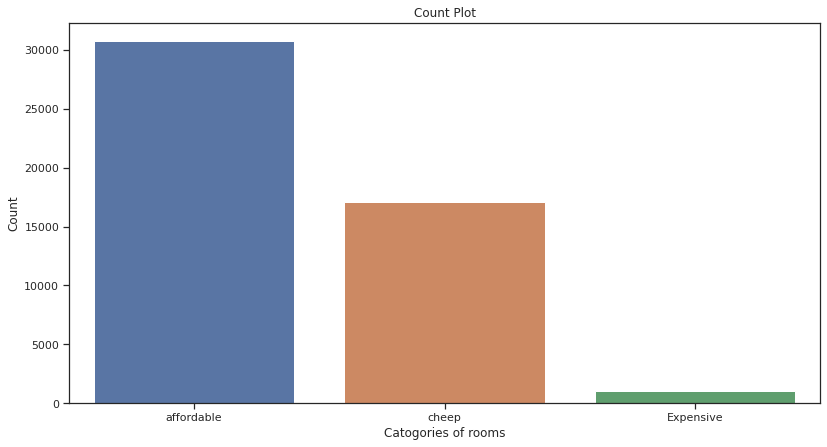

In [186]:
plt.figure(figsize=(12,7))
ax_7 = sns.countplot(data.price.apply(price_catagory))
ax_7.set_title('Count Plot')
ax_7.set_xlabel('Catogories of rooms')
ax_7.set_ylabel("Count")
plt.show()

Observations

1)we have considered to devide the whole price range into three catogories
   
    cheap (price range below or equal to 80$)

    Affordable(for price range 80 to 500$)

    Expensive(for price range more then 500$) so, it look like people have more   intrest in having "affordable" rooms/apartments rathre then having cheep and expensive rooms.

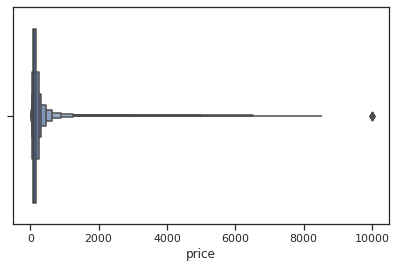

In [187]:
figsize=(12,8)
sns.boxenplot(x='price',data=data)

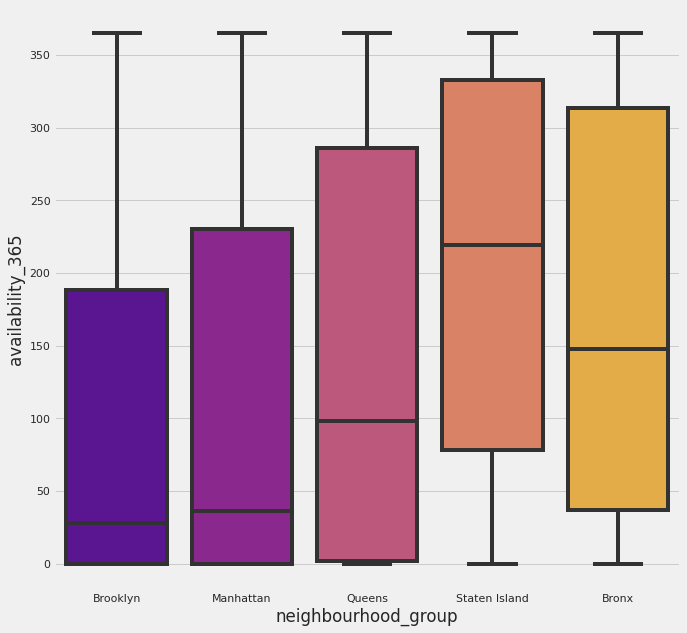

In [222]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

#Average room rent for locality

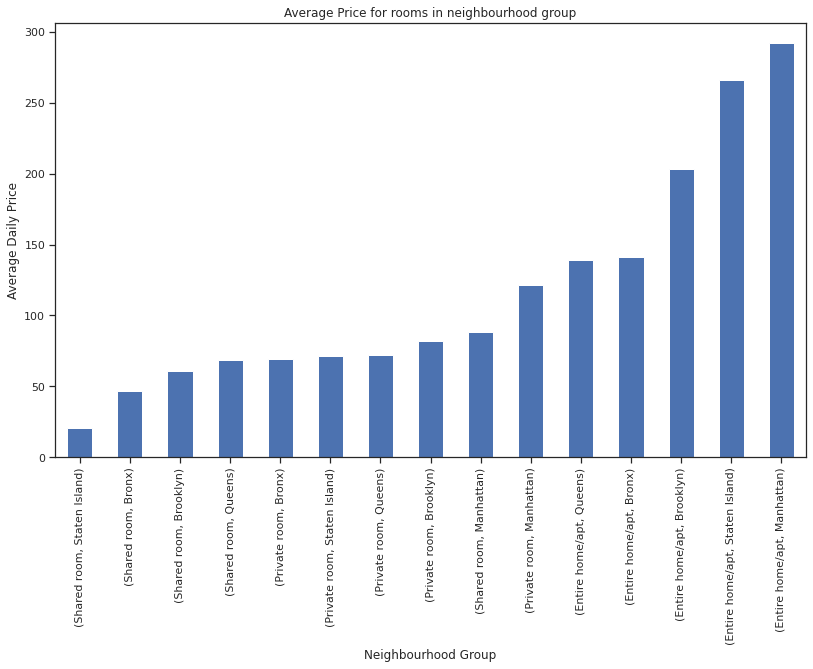

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [188]:
data.head()
plt.figure(figsize=(12,8))
df = data[data['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')


**Expensive Neighbourhood**

Top 20 most expensive locality in Airbnb listing are :


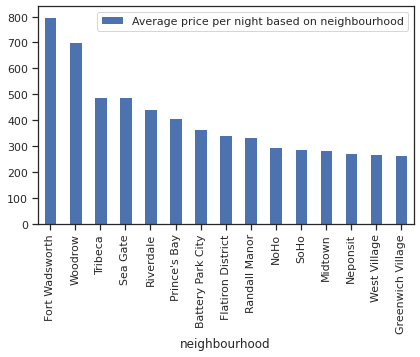

,Average price per night based on neighbourhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [189]:
print('Top 20 most expensive locality in Airbnb listing are :')
df4 = data.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


**LEAST EXPENSIVE**

Least expensive neighbourhood according to Airbnb listing are


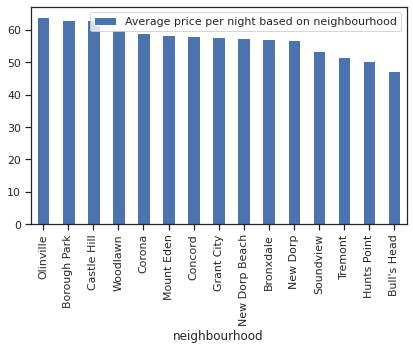

,Average price per night based on neighbourhood
neighbourhood,
Olinville,64.000000
Borough Park,63.066176
Castle Hill,63.000000
Woodlawn,60.090909
Corona,59.171875
Mount Eden,58.500000
Concord,58.192308
Grant City,57.666667
New Dorp Beach,57.400000


In [190]:
print('Least expensive neighbourhood according to Airbnb listing are')
df4 = data.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


Most number of locality listed

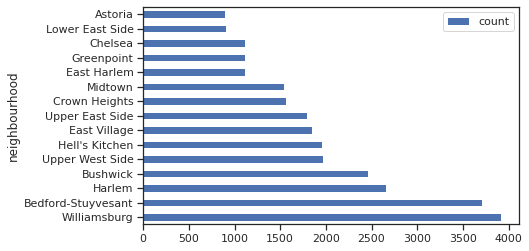

,count
neighbourhood,
Williamsburg,3919
Bedford-Stuyvesant,3714
Harlem,2656
Bushwick,2464
Upper West Side,1970
Hell's Kitchen,1955
East Village,1853
Upper East Side,1797
Crown Heights,1563


In [191]:
df5 = data.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood')

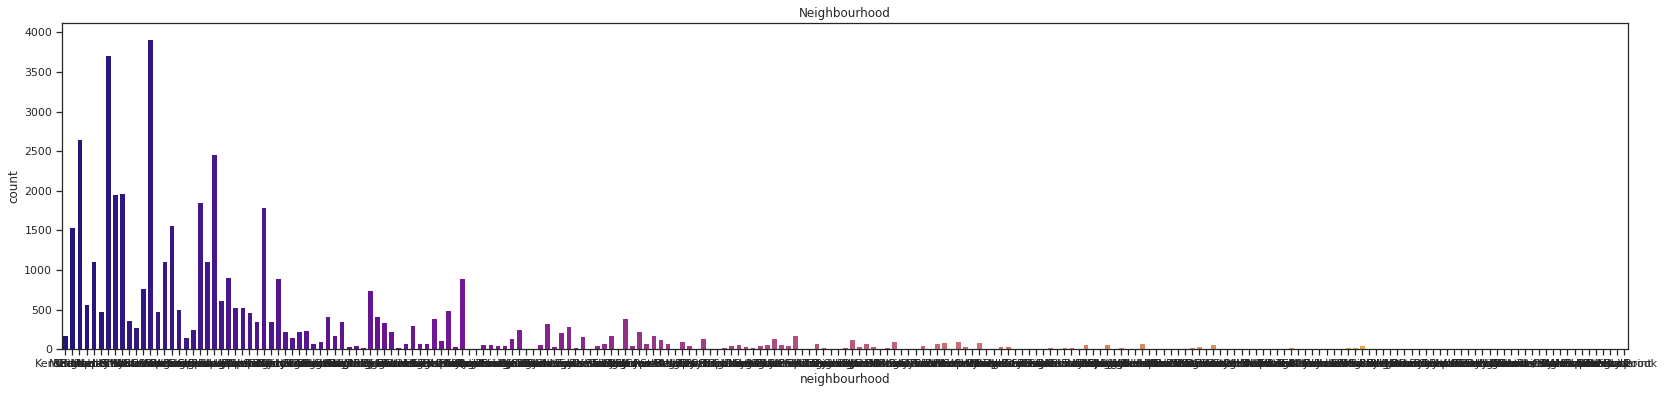

In [192]:
sns.countplot(data['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

##8) Minimum_nights:

In [193]:
data[["minimum_nights"]].value_counts()

minimum_nights
1                 12720
2                 11696
3                  7999
30                 3760
4                  3303
                  ...  
182                   1
183                   1
184                   1
185                   1
1250                  1
Length: 109, dtype: int64

In [194]:
data[['minimum_nights']].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


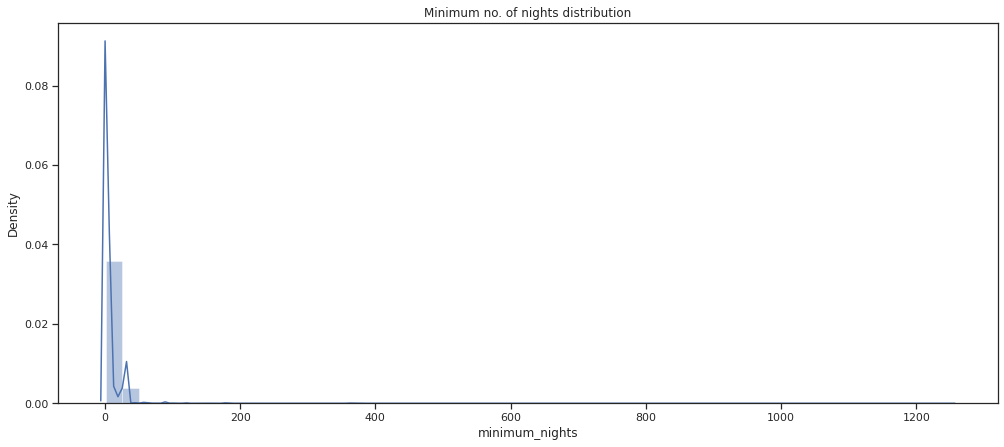

In [195]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.distplot(data.minimum_nights)
plt.title('Minimum no. of nights distribution')
plt.show()

Observations

1)most of the neights booked are from 0 to less then 100 days. we will plot further and see.

2)we can see that there may be outliers.we can plot and check it.

3)we will plot box plot and check.

4)log scale can show us the shape of skwed data.

##9) Number_of_reviews:

In [196]:
data[['number_of_reviews']].value_counts()

number_of_reviews
0                    10052
1                     5244
2                     3465
3                     2520
4                     1994
                     ...  
352                      1
351                      1
341                      1
340                      1
629                      1
Length: 394, dtype: int64

In [197]:
data[['number_of_reviews']].describe()

,number_of_reviews
count,48895.000000
mean,23.274466
std,44.550582
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number_of_reviews')

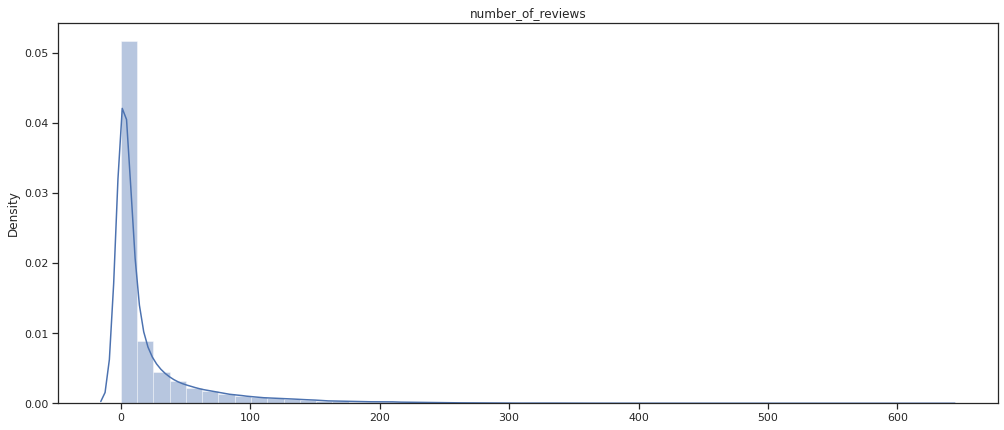

In [198]:
plt.figure(figsize=(15,7))
ax = sns.distplot(x=data["number_of_reviews"])
plt.title('number_of_reviews')

Observatios

1)Number of reviews are highly dense form 0 to 100 reviews.

2)we can say that most of the rooms are not rated and those which are frequently occupied only those are rated.

3)maximun 629 times the perticular room is rated.

4)Average rating is around 23.

##10) Last_review:

In [199]:
data[['last_review']]

,last_review
0,2018-10-19
1,2019-05-21
2,0
3,2019-07-05
4,2018-11-19
...,...
48890,0
48891,0
48892,0
48893,0


Observations

1)This is the column which signifies the last time the room was given review.

2)secondly,there are certain rooms which are not reviewd at all, it acan happen that no one had visited till now or not bothered to give review to those rooms.

3)Also there are nan valuse thse values can either be filled with the help of domaiin expert or with suitable value like since no one has reviwed we will fill it up with 'zeros'.

##11) Reviews_per_month:

In [200]:
data[["reviews_per_month"]].describe()

,reviews_per_month
count,48895.000000
mean,1.090910
std,1.597283
min,0.000000
25%,0.040000
50%,0.370000
75%,1.580000
max,58.500000


Observations:

1)max is 58 times the rating is given.

2)min is 0.

3)75% of data is for 1.5 time rating.

column_no_10 calculated_host_listings_count:

In [201]:
Counter(data['calculated_host_listings_count']).most_common(50)

[(1, 32303),
 (2, 6658),
 (3, 2853),
 (4, 1440),
 (5, 845),
 (6, 570),
 (8, 416),
 (7, 399),
 (327, 327),
 (9, 234),
 (232, 232),
 (10, 210),
 (96, 192),
 (12, 180),
 (13, 130),
 (121, 121),
 (11, 110),
 (52, 104),
 (103, 103),
 (33, 99),
 (49, 98),
 (91, 91),
 (87, 87),
 (15, 75),
 (14, 70),
 (23, 69),
 (34, 68),
 (17, 68),
 (65, 65),
 (31, 62),
 (28, 56),
 (18, 54),
 (50, 50),
 (25, 50),
 (47, 47),
 (43, 43),
 (20, 40),
 (39, 39),
 (37, 37),
 (32, 32),
 (30, 30),
 (29, 29),
 (27, 27),
 (26, 26),
 (21, 21),
 (19, 19),
 (16, 16)]

In [202]:
print(f'1. There is one host who is {data.calculated_host_listings_count.max()} time listed. ')
print(f'2. This is the corresponding host_id {data.host_id.value_counts().idxmax()} who is having highest listing. ')
print(f'2. This is the corresponding host_id {data.host_id.value_counts().idxmin()} who is having lowest listing. ')

1. There is one host who is 327 time listed. 
2. This is the corresponding host_id 219517861 who is having highest listing. 
2. This is the corresponding host_id 28638583 who is having lowest listing. 


##12) Availability_365:

In [203]:
data[['availability_365']].value_counts()

availability_365
0                   17533
365                  1295
364                   491
1                     408
89                    361
                    ...  
195                    26
196                    24
183                    24
181                    23
202                    20
Length: 366, dtype: int64

Text(0.5, 1.0, 'Scatterplot_availability_365')

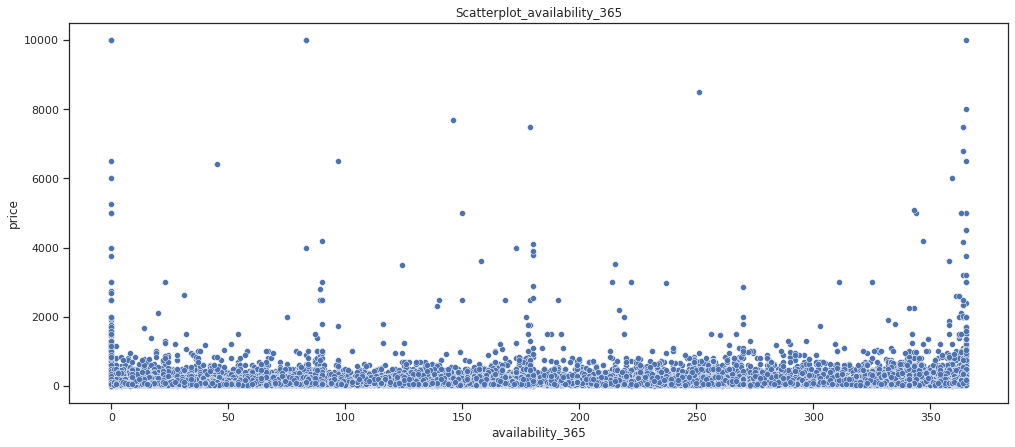

In [204]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(data=data,x='availability_365',y='price')
plt.title("Scatterplot_availability_365")

Observations

1)From above plot we can see that most of the available rooms are in the proce range of 0 to 2000.

2)Very few are available for price above 2000$ , this is quite obivious that there are very few peoples who prefer to have expensive rooms.

#Lets find the relation between neighbourhood_group and price:

In [205]:
price_df = pd.DataFrame(data['price'].apply(price_catagory))

In [206]:
price_df.head()

,price
0,affordable
1,affordable
2,affordable
3,affordable
4,cheep


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


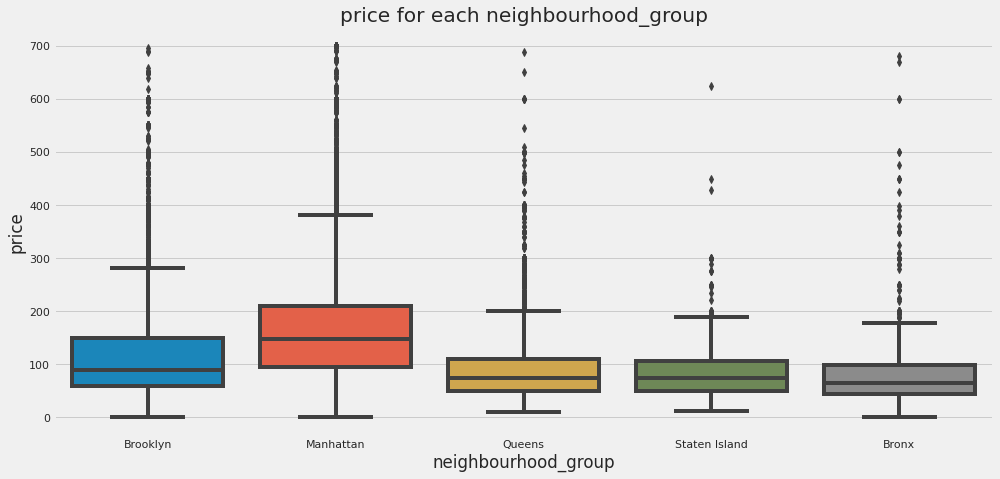

In [207]:
plt.style.use('fivethirtyeight')

price_500 = data[data.price <700]
plt.figure(figsize=(15,7))
plt.title("price for each neighbourhood_group")
sns.boxplot('neighbourhood_group','price',data=price_500)
plt.show()

Observations:

1)We can see that Manhattam is the most expensive destination immediatly followed by Brooklyn.

2)Queens, staten island and Bronx, are having price range less as compaired to other two.

#Relationship between neighbourhood_group and median price.

In [208]:
#grouping median price with neighbourhood_group.
neigh_group_price_group = data.groupby(['neighbourhood_group']).agg({'price':'median'})
neigh_group_price_group.reset_index(inplace=True)

In [209]:
neigh_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


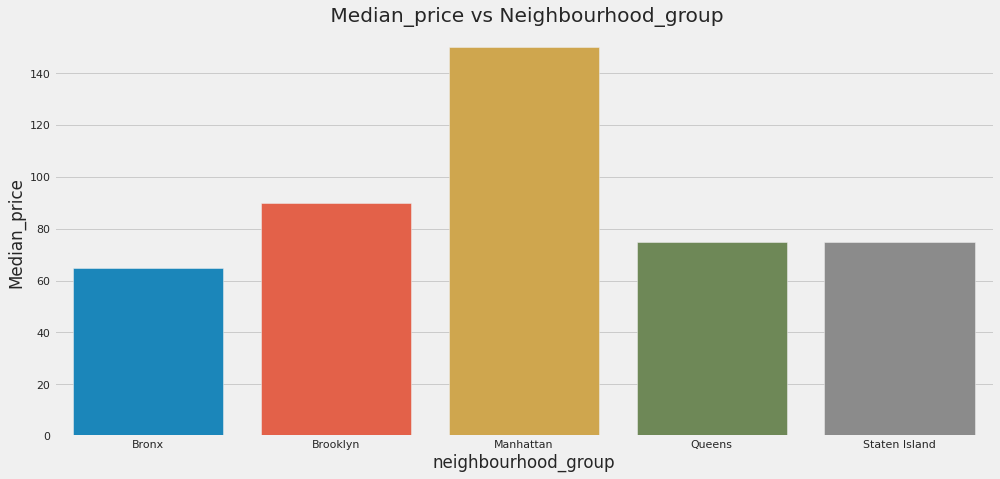

In [210]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,7))
ax_12 = sns.barplot('neighbourhood_group','price',data = neigh_group_price_group)
ax_12.set_title(' Median_price vs Neighbourhood_group')
ax_12.set_xlabel('neighbourhood_group')
ax_12.set_ylabel("Median_price")
plt.show()

Observations:

'Manhattan' is the area having highest median price,followed by Brooklyn.

#Lets find the relation between neighbourhood and price:
#1)We will make group of all neighbourhood who are having median of price varable.

#2)Median have less impact of outliers as compaired to mean.

In [211]:
data.neighbourhood.nunique()

221

In [212]:
#we will
neigh_price_group = data.groupby(['neighbourhood']).agg({'price':'median'})
neigh_price_group.reset_index(inplace=True)

In [213]:
neigh_price_group

,neighbourhood,price
0,Allerton,66.5
1,Arden Heights,72.5
2,Arrochar,65.0
3,Arverne,125.0
4,Astoria,85.0
...,...,...
216,Windsor Terrace,123.0
217,Woodhaven,52.0
218,Woodlawn,68.0
219,Woodrow,700.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


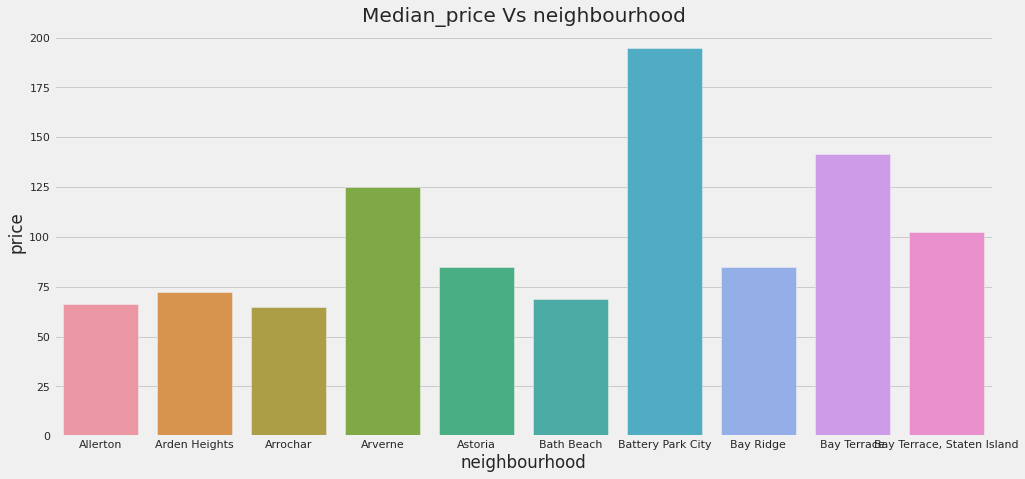

In [214]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,7))
sns.barplot('neighbourhood','price',data = neigh_price_group.head(10))
plt.title("Median_price Vs neighbourhood")
plt.show()

Observations:

1)The price variation considering median value tells us that 'Allerton', 'Asden Heights','Arrochar',and other are the top 10 neighbourhoods.

2)'Battery Park city' is having high price in Top 10 neighbourhoods.

#Relationship between price and room_type.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


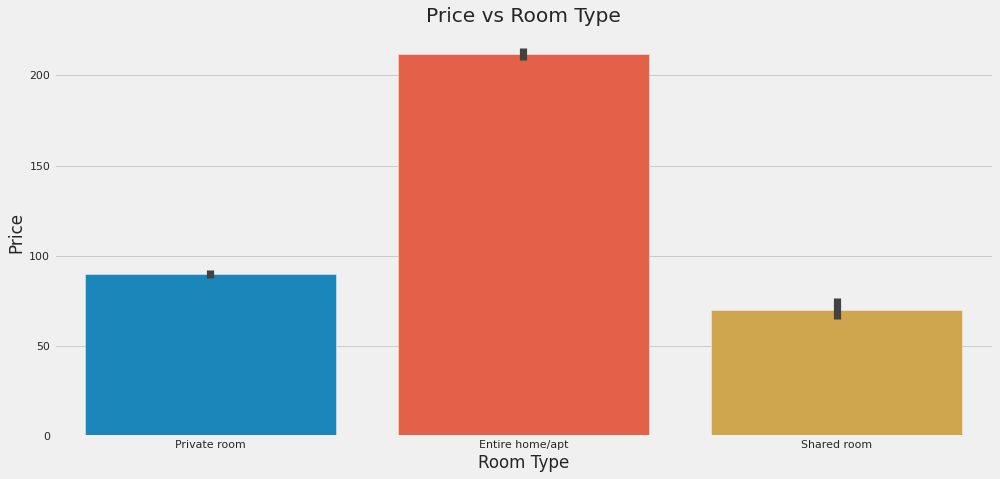

In [215]:
plt.figure(figsize = (15,7))
ax_8 = sns.barplot('room_type','price',data=data)
ax_8.set_title('Price vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel("Price")
plt.show()

Observations

1)we can see that most of the prices for all type of rooms lies with 2000$.

2)shared rooms prices are having very less price.

3)very few rooms are there whic are in expensive cataagory.

4)large number of rooms are available in either entire room/apartment or private rooms/apartment.

In [216]:
data["number_of_reviews"].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

#Relationship between room_type and neighbourhood_group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


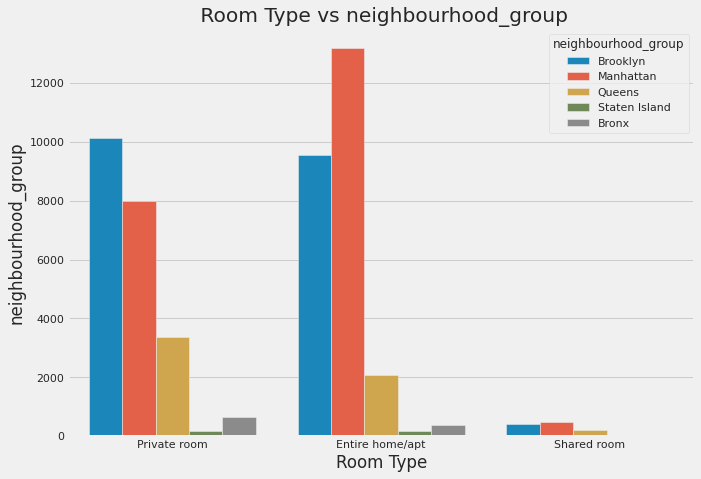

In [217]:
plt.figure(figsize = (10,7))
ax_11 = sns.countplot('room_type',hue='neighbourhood_group',data=data)
ax_11.set_title(' Room Type vs neighbourhood_group')
ax_11.set_xlabel('Room Type')
ax_11.set_ylabel("neighbourhood_group")
plt.show()

#Which neighbourhood are generating maximum,minimum,reveneus from room types.

In [218]:
room_type_df = data.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
room_type_df.sort_values("price",ascending=False)

,,price
neighbourhood,room_type,
Williamsburg,Entire home/apt,389724
Midtown,Entire home/apt,331395
Upper West Side,Entire home/apt,329129
Hell's Kitchen,Entire home/apt,301786
Upper East Side,Entire home/apt,284150
...,...,...
South Beach,Shared room,20
Morris Heights,Shared room,20
Schuylerville,Shared room,20


In [219]:
room_type_df = pd.pivot_table(room_type_df, values='price', index=['neighbourhood'], columns=['room_type'])

In [220]:
room_type_df.head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Allerton,1969.0,1710.0,NaN
Arden Heights,228.0,41.0,NaN
Arrochar,1897.0,518.0,NaN
Arverne,10782.0,2369.0,76.0
Astoria,54178.0,47512.0,3779.0


In [221]:
print("Maximun revenue in Entire home/apt...\n")
print(room_type_df.sort_values('Entire home/apt',ascending=False).head(1),'\n')

print("-"*50,'\n')

print("Minimun revenue in Entire home/apt...",'\n')
print(room_type_df.sort_values('Entire home/apt',ascending=True).head(1),'\n')

print("-"*50,'\n')

print("Maximun revenue in Private room...\n")
print(room_type_df.sort_values('Private room',ascending=False).head(1),'\n')

print("-"*50,'\n')

print("Minimun revenue in Private room...\n")
print(room_type_df.sort_values('Private room',ascending=True).head(1),'\n')



print("-"*50,'\n')

print("Maximun revenue in Shared room...\n")
print(room_type_df.sort_values('Shared room',ascending=False).head(1),'\n')



print("-"*50,'\n')

print("Minimum revenue in Shared room...\n")
print(room_type_df.sort_values('Shared room',ascending=True).head(1),'\n')

Maximun revenue in Entire home/apt...

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0 

-------------------------------------------------- 

Minimun revenue in Entire home/apt... 

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
New Dorp                  57.0           NaN          NaN 

-------------------------------------------------- 

Maximun revenue in Private room...

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0 

-------------------------------------------------- 

Minimun revenue in Private room...

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Graniteville             186.0          20.0  

#Conclusion:
#We tried to put some light by performed the Extensive EDA for Airbnb dataset as allways there is no end to EDA this can be extended in n-dimenssions and lots and lots of conclusion can be drawn from EDA this is where 80% of time is been spent by and Data Scientist.


